<h1>Transfer learning in image classification


In this notebook I will use transfer learning and take pre-trained model from google's Tensorflow Hub and re-train that on flowers dataset.

<b>Using pre-trained model saves lot of time and computational budget for new classification problem at hand.

In [1]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


%matplotlib inline

- Make predictions using ready made model (without any training)



In [2]:
IMAGE_SHAPE = (224, 224)

classifier = Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


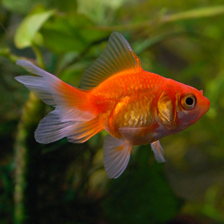

In [3]:
gold_fish = Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [4]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [5]:
gold_fish[np.newaxis, ...]

array([[[[0.28235294, 0.33333333, 0.07058824],
         [0.31372549, 0.37254902, 0.09019608],
         [0.34901961, 0.41960784, 0.11764706],
         ...,
         [0.32941176, 0.39215686, 0.00392157],
         [0.32156863, 0.38431373, 0.00392157],
         [0.30980392, 0.36862745, 0.        ]],

        [[0.28627451, 0.33333333, 0.08235294],
         [0.3254902 , 0.38039216, 0.10980392],
         [0.35294118, 0.42352941, 0.12941176],
         ...,
         [0.32156863, 0.38039216, 0.00392157],
         [0.31372549, 0.37254902, 0.00392157],
         [0.30196078, 0.36078431, 0.        ]],

        [[0.28627451, 0.33333333, 0.08627451],
         [0.31372549, 0.36862745, 0.10196078],
         [0.34509804, 0.41568627, 0.12941176],
         ...,
         [0.31764706, 0.37647059, 0.00392157],
         [0.30980392, 0.36862745, 0.00784314],
         [0.29803922, 0.35686275, 0.00392157]],

        ...,

        [[0.05490196, 0.10980392, 0.01568627],
         [0.05098039, 0.11372549, 0.01960784]

In [6]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [7]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 1s 1s/step


(1, 1001)

In [8]:
predicted_label_index = np.argmax(result[0])
predicted_label_index

2

In [9]:
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:10]

['background',
 'tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen']

In [10]:
image_labels[predicted_label_index]

'goldfish'

### Load flowers dataset

In [11]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [12]:
data_dir

'./datasets/flower_photos'

In [13]:
import pathlib

data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [14]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/dandelion/9011235009_58c7b244c1_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/14845607659_1be18c5d7f.jpg'),
 PosixPath('datasets/flower_photos/dandelion/19602790836_912d38aaa8.jpg'),
 PosixPath('datasets/flower_photos/dandelion/19064700925_b93d474e37.jpg'),
 PosixPath('datasets/flower_photos/dandelion/14065420729_9b388bf7cb_m.jpg')]

In [15]:
image_count = list(data_dir.glob('*/*.jpg'))
image_count[:5]

[PosixPath('datasets/flower_photos/dandelion/9011235009_58c7b244c1_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/14845607659_1be18c5d7f.jpg'),
 PosixPath('datasets/flower_photos/dandelion/19602790836_912d38aaa8.jpg'),
 PosixPath('datasets/flower_photos/dandelion/19064700925_b93d474e37.jpg'),
 PosixPath('datasets/flower_photos/dandelion/14065420729_9b388bf7cb_m.jpg')]

In [16]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/21347496068_f4d3339607.jpg'),
 PosixPath('datasets/flower_photos/roses/7187035716_5d0fb95c31_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8775267816_726ddc6d92_n.jpg'),
 PosixPath('datasets/flower_photos/roses/272481307_1eb47ba3e0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4093390305_4010c736c9.jpg')]

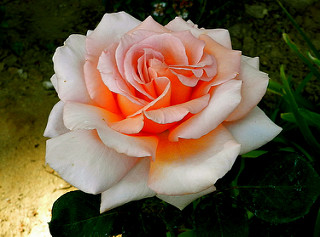

In [17]:
Image.open(str(roses[1]))

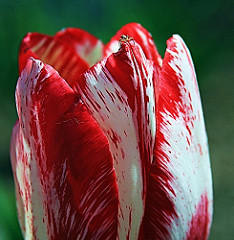

In [18]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[0]))

### Read flowers images from disk into numpy array using opencv

In [19]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [20]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [21]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/21347496068_f4d3339607.jpg'),
 PosixPath('datasets/flower_photos/roses/7187035716_5d0fb95c31_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8775267816_726ddc6d92_n.jpg'),
 PosixPath('datasets/flower_photos/roses/272481307_1eb47ba3e0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4093390305_4010c736c9.jpg')]

In [22]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/21347496068_f4d3339607.jpg'

In [23]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(333, 500, 3)

In [24]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [25]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [26]:
X = np.array(X)
y = np.array(y)

### Train test split


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Preprocessing: scale images


In [28]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

<b>Make prediction using pre-trained model on new flowers dataset

</b>

In [29]:
X[0].shape

(224, 224, 3)

In [30]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [31]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

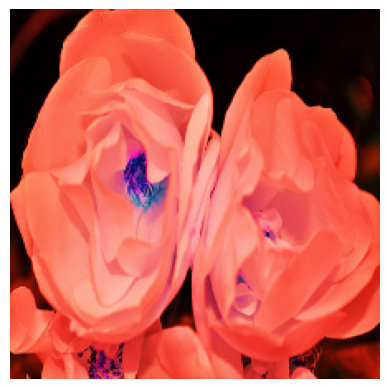

In [32]:
plt.axis('off')
plt.imshow(X[0])

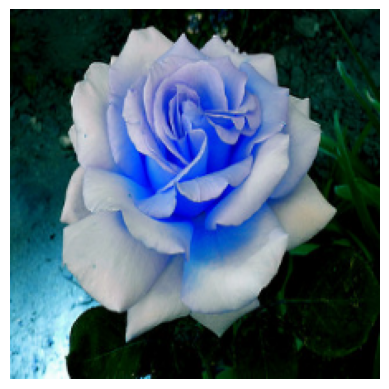

In [33]:
plt.axis('off')
plt.imshow(X[1])

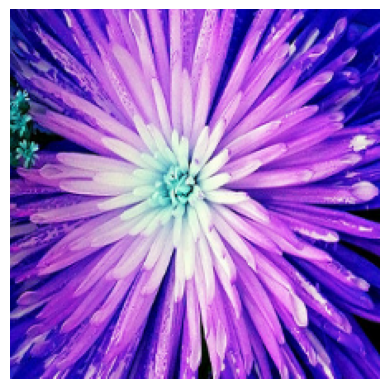

In [34]:
plt.axis('off')
plt.imshow(X[2])

In [35]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 1s 637ms/step


array([795, 722, 795])

In [36]:
image_labels[795]

'shower curtain'

### Now take pre-trained model and retrain it using flowers images


In [37]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [38]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [39]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 126s 1s/step - loss: 0.7875 - acc: 0.7129
Epoch 2/5
86/86 [==============================] - 117s 1s/step - loss: 0.3985 - acc: 0.8721
Epoch 3/5
86/86 [==============================] - 120s 1s/step - loss: 0.3155 - acc: 0.8979
Epoch 4/5
86/86 [==============================] - 122s 1s/step - loss: 0.2618 - acc: 0.9193
Epoch 5/5
86/86 [==============================] - 126s 1s/step - loss: 0.2234 - acc: 0.9357


In [40]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 37s 1s/step - loss: 0.3860 - acc: 0.8562


[0.3860304355621338, 0.8562091588973999]